# NLP trial

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras import models, layers, optimizers, losses, metrics
import numpy as np

Using TensorFlow backend.


In [2]:
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

In [3]:
print(test_data.shape)

(25000,)


In [4]:
print(len(train_data[2]))
print(len(train_data[5]))

141
43


Input data is encoded as numbers.  These are stored in the dirctionary.  

Building a text out of it works as follows:

In [5]:
word_index = imdb.get_word_index()

reverse_word_index = dict(
    [(value, key) for key, value in word_index.items()]
)

sample_index = 65
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[sample_index]]
)

print(train_label[sample_index])
print(decoded_review)

1
? dressed to kill understandably made a bit of a ? when first released in 1980 you had police girl in a role that was mega erotic as angie ? played a sexually frustrated housewife looking for good times in all the wrong ? and there into apartment ? plus nancy allen as a call girl michael caine as norman ? sophisticated new york cousin and enough lurid imagery to last two movies of the period today it's slightly less ? by standards and such though the ? version has some of the most hot content of any of de palma's films at least in his quasi auteur period of the 70s and early 80s where he seemed to repeat themes over and over ideas taken right off the film ? of hitchcock classics and given a ? ? it's a simple tale that one partly already saw in sisters and then again to an extent in body double and also in blow out ? allen plays call girl liz blake who has to clear her name of suspicion of killing kate dickinson in full blown ? mode after being found with a razor the murder weapon fro

Binary label encodes thumbs up (1) / tumbs down (0)

Goal:  Train the system to classify 1 / 0 on the bases of the review text.

## Data preprocessing

Input data has different lengths.  To equalize that, we map each sequence onto the dictionary.  Therefore, we are doing doing the following:
    
Example:

    Having a dictionary 
        dict = [am, i, the , hello, tristan, world]
    
    I am tristan   = [1, 1, 0, 0, 1, 0]
    
    I am the world = [1, 1, 1, 0, 0, 1]
    
    hello world    = [0, 0, 0, 1, 0, 1]

In [6]:
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1                    # fancy indexing
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

y_train = np.asarray(train_label).astype("float32")
y_test = np.asarray(test_label).astype("float32")

In [7]:
print(x_train[0])
print(y_train[0])

[0. 1. 1. ... 0. 0. 0.]
1.0


Now we are done with the data preprocessing.

## Defining a validation set

Now split the test data in two pieces:
    1. validation  <-
    2. test

In [8]:
x_val = x_train[: 10000]
partial_x_train = x_train[10000: ]

y_val = y_train[: 10000]
partial_y_train = y_train[10000: ]

In [54]:
model = models.Sequential()

model.add(layers.Dense(
    16,   # Number of hidden units / output size
    activation="relu",
    input_shape=(10000, )
))

model.add(layers.Dense(
    16,
    activation="relu"
))
          
model.add(layers.Dense(
    1,
    activation="sigmoid"
))

model.summary()

model.compile(
    optimizer=optimizers.RMSprop(lr=0.0015),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 6)                 60006     
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 14        
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 3         
Total params: 60,023
Trainable params: 60,023
Non-trainable params: 0
_________________________________________________________________


In [55]:
history = model.fit(
    partial_x_train, partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.6088 - binary_accuracy: 0.6865 - val_loss: 0.5553 - val_binary_accuracy: 0.7745
Epoch 2/20
15000/15000 [==============================] - 3s 174us/step - loss: 0.5087 - binary_accuracy: 0.8238 - val_loss: 0.5085 - val_binary_accuracy: 0.8068
Epoch 3/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.4564 - binary_accuracy: 0.8754 - val_loss: 0.4883 - val_binary_accuracy: 0.8136
Epoch 4/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.4183 - binary_accuracy: 0.9056 - val_loss: 0.4607 - val_binary_accuracy: 0.8628
Epoch 5/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.3891 - binary_accuracy: 0.9283 - val_loss: 0.4472 - val_binary_accuracy: 0.8763
Epoch 6/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.3637 - binary_accuracy: 0.9427 - val_loss: 0.4394 - val_bi

In [56]:
print(history.history) 

{'val_loss': [0.5553202676773071, 0.5085094835281372, 0.4883024980545044, 0.46071067447662356, 0.447166924571991, 0.43941950645446776, 0.45844864315986633, 0.44776366634368897, 0.4436542646408081, 0.4387910879611969, 0.45220333395004275, 0.46858066396713255, 0.4841140289306641, 0.5733950271606445, 0.5335547667503356, 0.5336606590270996, 0.551015954208374, 0.606368557357788, 0.6152366879463196, 0.6123610533714294], 'val_binary_accuracy': [0.7745000007629395, 0.8068, 0.8136000002861022, 0.8627999995231629, 0.8763, 0.8795999999046326, 0.8621999997138977, 0.8701999997138977, 0.8742999998092651, 0.8753999998092651, 0.8729999997138977, 0.8687999997138977, 0.8658999995231629, 0.8499999992370606, 0.8598999994277954, 0.860900000667572, 0.8596999992370605, 0.8554999992370605, 0.8553000007629394, 0.8580999992370606], 'loss': [0.6088058731396992, 0.5087473052978516, 0.4564092382113139, 0.41833371017773946, 0.389091028102239, 0.3636644759654999, 0.3430522557735443, 0.3233643827279409, 0.30659004804

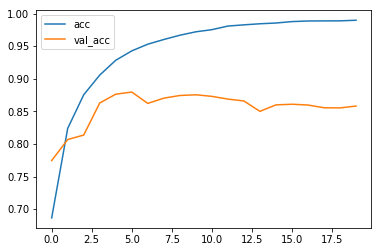

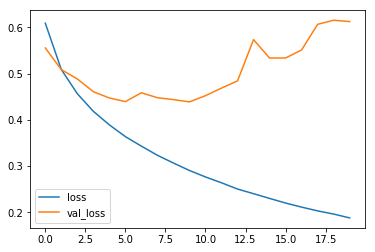

In [57]:
def plot_history(history):
    plt.plot(history["binary_accuracy"], label="acc")
    plt.plot(history["val_binary_accuracy"], label="val_acc")
    plt.legend()
    plt.show()
    plt.close()
    
    plt.plot(history["loss"], label="loss")
    plt.plot(history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()
    plt.close()

plot_history(history.history)   

Plot 1 - blue (training data):
- accuracy has a steep start and converges then
- if start is too steep:  lower lr
- if start is not steep enough:  enlargen lr

Plot 1 - orange (validation data):
- __overfitting __
- stop training


## Overcome overfitting
### 1. Decrease size of the neuronal network
### 2. Stop learning at minimum loss
### 3. Increase database